# Aya Migadi  And Lara Smadi

# Santander Customer Transaction Prediction


## Load Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

## Loading Data

In [78]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

# <a>Data Exploration</a>

In [3]:
print("dimensions of train data:",train_df.shape)
print("dimensions of test data:",test_df.shape)

dimensions of train data: (200000, 202)
dimensions of test data: (200000, 201)


Both the data sets have 200000 observations with 202 & 201 columns respectively

In [4]:
train_df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [5]:
train_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [6]:
train_df.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [7]:
test_df.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [9]:
test_df.describe()

var_0          var_1          var_2          var_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       10.658737      -1.624244      10.707452       6.788214   
std         3.036716       4.040509       2.633888       2.052724   
min         0.188700     -15.043400       2.355200      -0.022400   
25%         8.442975      -4.700125       8.735600       5.230500   
50%        10.513800      -1.590500      10.560700       6.822350   
75%        12.739600       1.343400      12.495025       8.327600   
max        22.323400       9.385100      18.714100      13.142000   

               var_4          var_5          var_6          var_7  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean       11.076399      -5.050558       5.415164      16.529143   
std         1.616456       7.869293       0.864686       3.424482   
min         5.484400     -27.767000       2.216400       5.713700   
25%         9.891075     -11.201400       4.772600      13.933900   
50%        11.099750      -4.834100       5.391600      16.422700   
75%        12.253400       0.942575       6.005800      19.094550   
max        16.037100      17.253700       8.302500      28.292800   

               var_8          var_9  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean        0.277135       7.569407  ...       3.189766       7.458269   
std         3.333375       1.231865  ...       4.551239       3.025189   
min        -9.956000       4.243300  ...     -14.093300      -2.407000   
25%        -2.303900       6.623800  ...      -0.095000       5.166500   
50%         0.372000       7.632000  ...       3.162400       7.379000   
75%         2.930025       8.584825  ...       6.336475       9.531100   
max         9.665500      11.003600  ...      20.359000      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.925944       3.322016      17.996967      -0.133657   
std         1.479966       3.995599       3.140652       1.429678   
min        -3.340900     -11.413100       9.382800      -4.911900   
25%         0.882975       0.587600      15.634775      -1.160700   
50%         1.892600       3.428500      17.977600      -0.162000   
75%         2.956000       6.174200      20.391725       0.837900   
max         8.005000      17.632600      27.947800       4.545400   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.290899       8.912428      15.869184      -3.246342  
std         5.446346       0.920904       3.008717      10.398589  
min       -13.944200       6.169600       6.584000     -39.457800  
25%        -1.948600       8.260075      13.847275     -11.124000  
50%         2.403600       8.892800      15.943400      -2.725950  
75%         6.519800       9.595900      18.045200       4.935400  
max        15.920700      12.275800      26.538400      27.907400  

[8 rows x 200 columns]

- Standard Deviation in both train and test is quite significant.
- Mean and other measures are close.

Text(0.5, 1.0, 'Distribution in Target Variable')

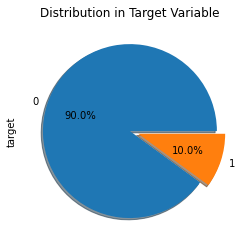

In [10]:
f,ax=plt.subplots(1,1,figsize=(6,4))
train_df['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
ax.set_title('Distribution in Target Variable')

# ##zero values more than 175000 #one values less than 25000 #( unbalanced data set)

Distributions columns


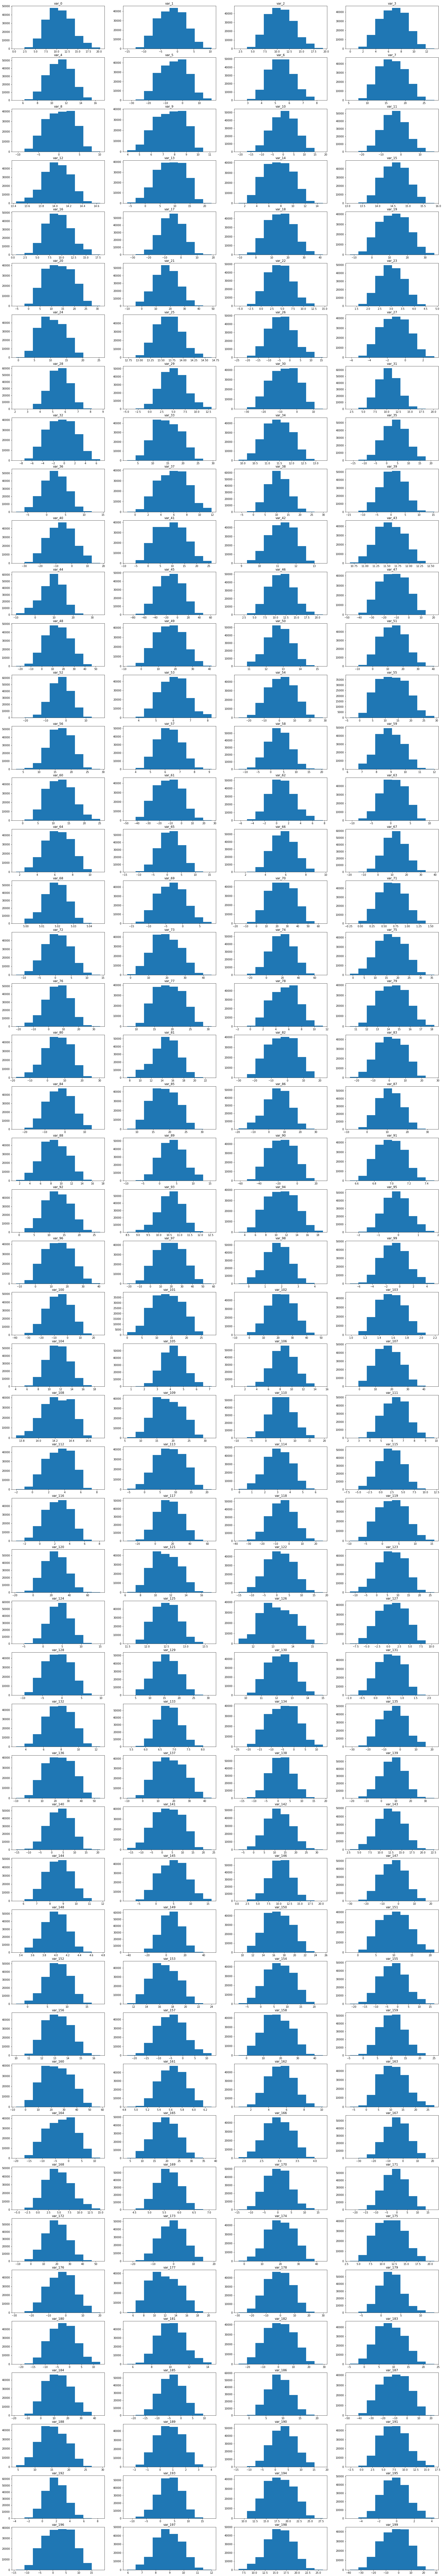

In [11]:
#### Histogram analysis of all the features:
numerical_features = train_df.columns[2:]
print('Distributions columns')
plt.figure(figsize=(30, 185))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(train_df[col]) 
    plt.title(col)

# ##Almost all features shows a normal distribution shap

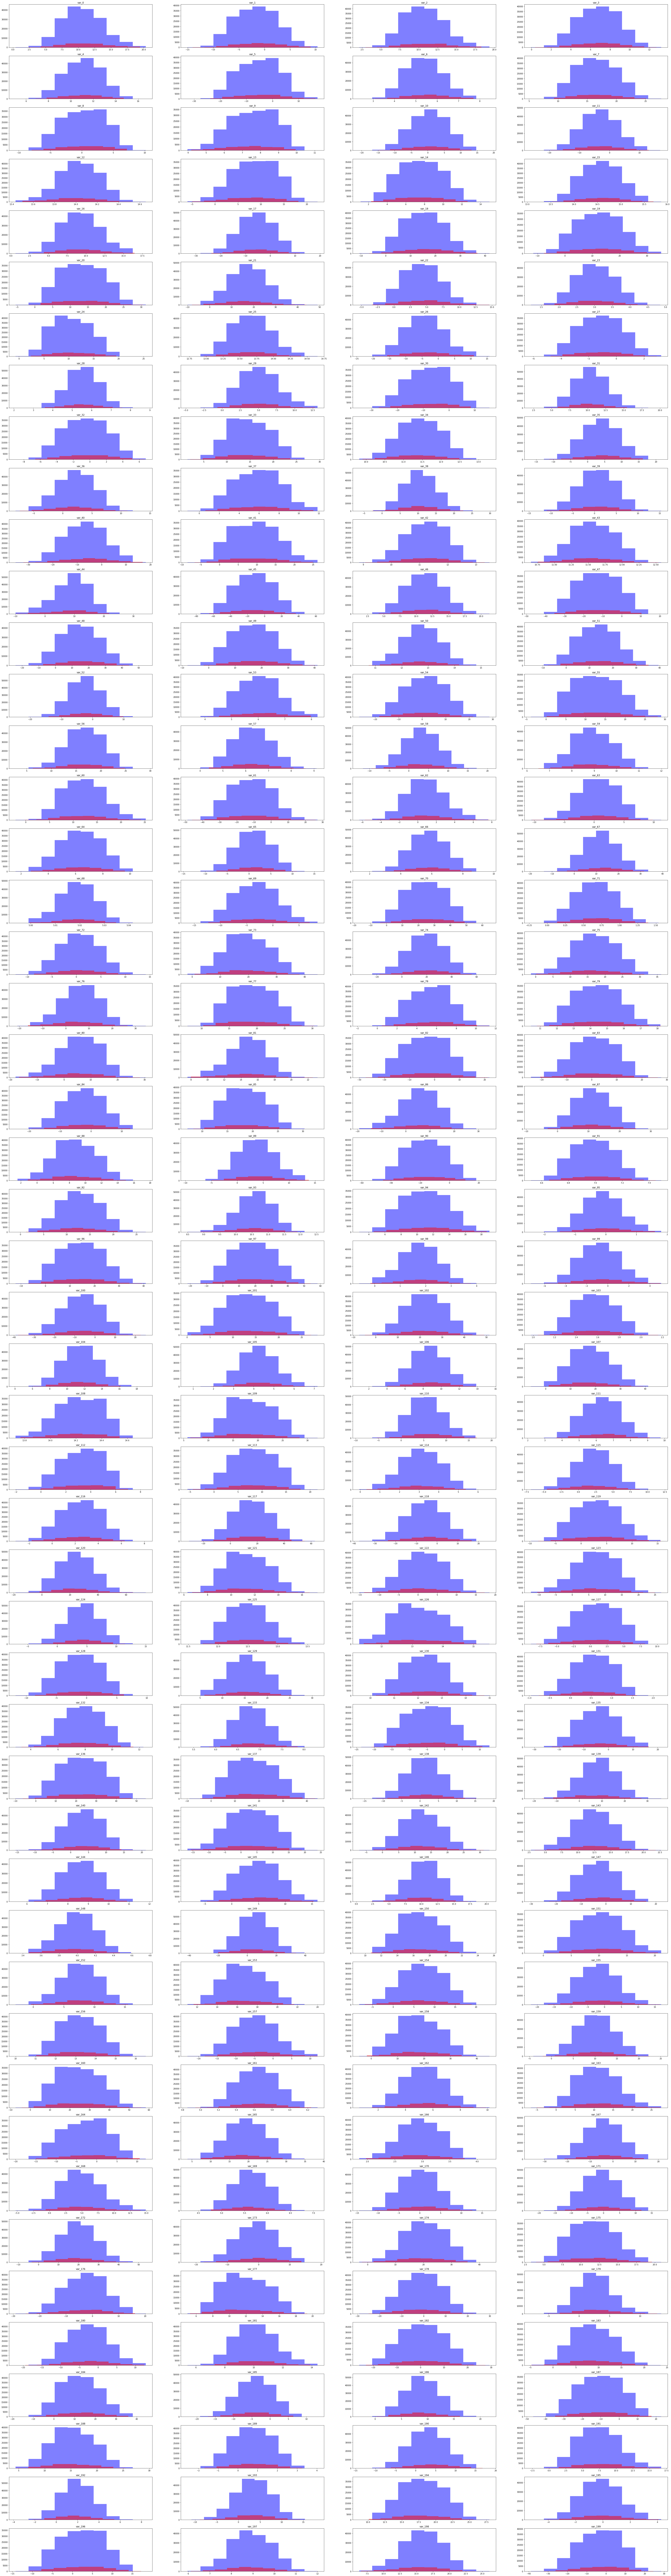

In [12]:
# distributions for for all numerical features per each class
plt.figure(figsize=(60, 240))
for i, col in enumerate(numerical_features):
    plt.subplot(50, 4, i + 1)
    plt.hist(train_df[train_df["target"] == 0][col], alpha=0.5, label='0', color='b')
    plt.hist(train_df[train_df["target"] == 1][col], alpha=0.5, label='1', color='r')    
    plt.title(col)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

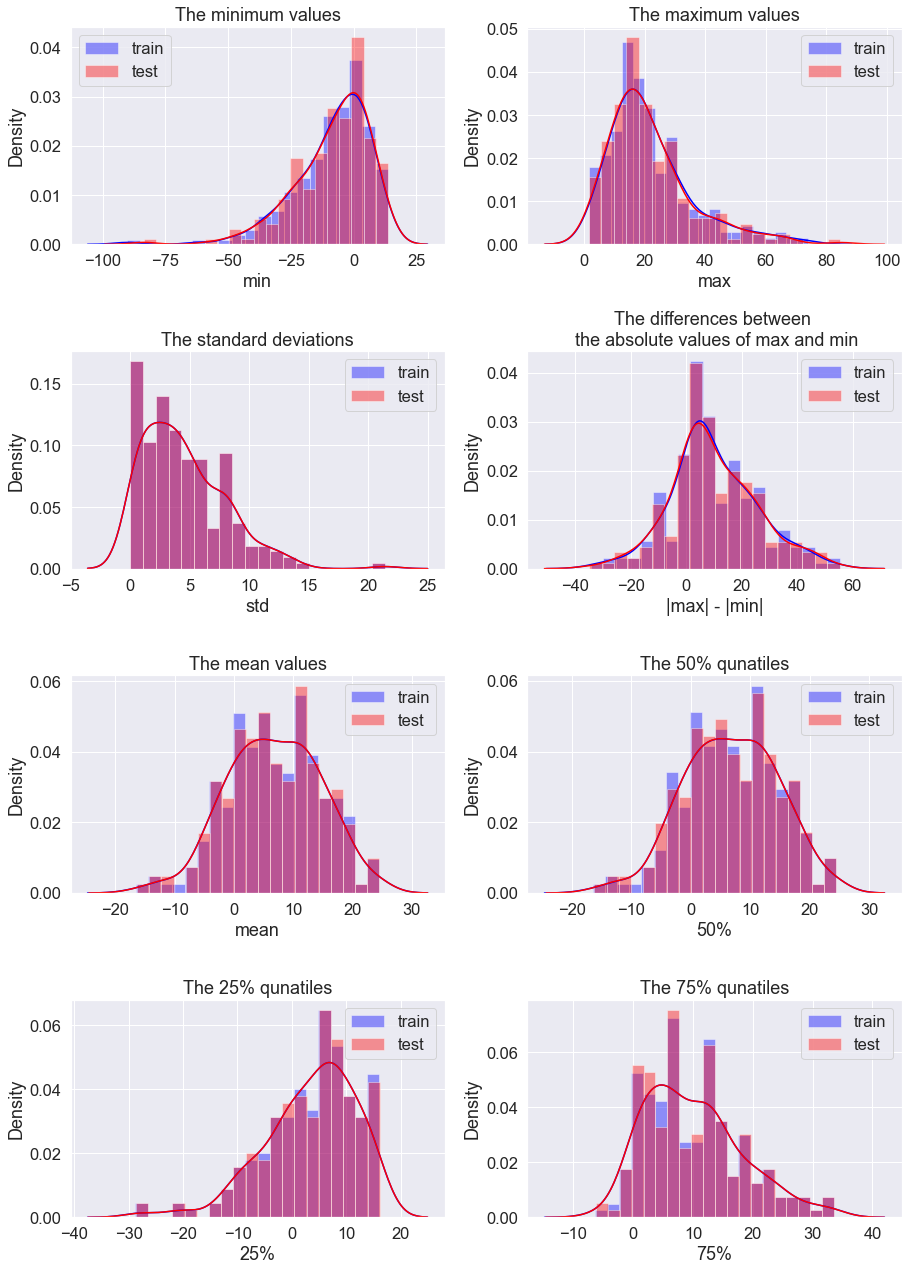

In [13]:
data_description_train = train_df.describe()
data_description_test = test_df.describe()

width = 13
height = 18
plt.figure(figsize=(width, height))

sns.set(font_scale=1.5)

col_train = 'blue'
col_test = 'red'

plt.subplot(4, 2, 1)
sns.distplot(data_description_train.loc['min', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['min', :], bins=20, color=col_test, label='test')
plt.title('The minimum values')
plt.ylabel('Density')
plt.legend()

plt.subplot(4, 2, 2)
sns.distplot(data_description_train.loc['max', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['max', :], bins=20, color=col_test, label='test')
plt.title('The maximum values')
plt.ylabel('Density')
plt.legend()

plt.subplot(4, 2, 3)
sns.distplot(data_description_train.loc['std', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['std', :], bins=20, color=col_test, label='test')
plt.title('The standard deviations')
plt.ylabel('Density')
plt.legend()

plt.subplot(4, 2, 4)
sns.distplot((np.absolute(data_description_train.loc['max', 'var_0':]) - 
              np.absolute(data_description_train.loc['min', 'var_0':])), 
              bins=20, color=col_train, label='train')

sns.distplot((np.absolute(data_description_test.loc['max', 'var_0':]) - 
              np.absolute(data_description_test.loc['min', 'var_0':])), 
              bins=20, color=col_test, label='test')

plt.title('The differences between \n the absolute values of max and min')
plt.ylabel('Density')
plt.xlabel('|max| - |min|')
plt.legend()

plt.subplot(4, 2, 5)
sns.distplot(data_description_train.loc['mean', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['mean', :], bins=20, color=col_test, label='test')
plt.title('The mean values')
plt.ylabel('Density')
plt.legend()

plt.subplot(4, 2, 6)
sns.distplot(data_description_train.loc['50%', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['50%', :], bins=20, color=col_test, label='test')
plt.title('The 50% qunatiles')
plt.ylabel('Density')
plt.legend()

plt.subplot(4, 2, 7)
sns.distplot(data_description_train.loc['25%', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['25%', :], bins=20, color=col_test, label='test')
plt.title('The 25% qunatiles')
plt.ylabel('Density')
plt.legend()

plt.subplot(4, 2, 8)
sns.distplot(data_description_train.loc['75%', 'var_0':], bins=20, color=col_train, label='train')
sns.distplot(data_description_test.loc['75%', :], bins=20, color=col_test, label='test')
plt.title('The 75% qunatiles')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()

### We see that the training and test data have very similar distributions of the numeric variables.
#In some cases, they look identical


## Missing value Analysis

In [14]:
#checking for missing values and data types in train data
value = []
for col in train_df.columns:
    dtype = str(train_df[col].dtype)
    value.append(dtype)
dt= pd.DataFrame(data=train_df.isnull().sum(),columns=['Missing'])
dt['dtypes']=value
np.transpose(dt)

ID_code target    var_0    var_1    var_2    var_3    var_4    var_5  \
Missing       0      0        0        0        0        0        0        0   
dtypes   object  int64  float64  float64  float64  float64  float64  float64   

           var_6    var_7  ...  var_190  var_191  var_192  var_193  var_194  \
Missing        0        0  ...        0        0        0        0        0   
dtypes   float64  float64  ...  float64  float64  float64  float64  float64   

         var_195  var_196  var_197  var_198  var_199  
Missing        0        0        0        0        0  
dtypes   float64  float64  float64  float64  float64  

[2 rows x 202 columns]

In [15]:
#checking for missing values and data types in test data
value = []
for col in test_df.columns:
    dtype = str(test_df[col].dtype)
    value.append(dtype)
dt= pd.DataFrame(data=test_df.isnull().sum(),columns=['Missing'])
dt['dtypes']=value
np.transpose(dt)

ID_code    var_0    var_1    var_2    var_3    var_4    var_5  \
Missing       0        0        0        0        0        0        0   
dtypes   object  float64  float64  float64  float64  float64  float64   

           var_6    var_7    var_8  ...  var_190  var_191  var_192  var_193  \
Missing        0        0        0  ...        0        0        0        0   
dtypes   float64  float64  float64  ...  float64  float64  float64  float64   

         var_194  var_195  var_196  var_197  var_198  var_199  
Missing        0        0        0        0        0        0  
dtypes   float64  float64  float64  float64  float64  float64  

[2 rows x 201 columns]

**So, there is no missing data in both the train & test data**
##### Both the data set have 200000 observations while only train data has target variable (int64) remaining all other variables are stored as (float64)

# <a>Exploratory data analysis</a>

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution in Target Variable ')

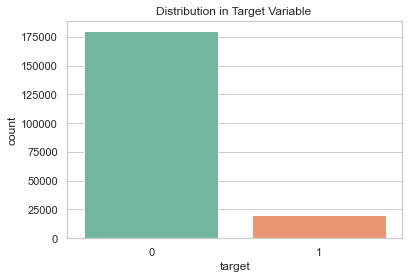

In [16]:
#checking the data distribution in target column
sns.set(style='whitegrid')
sns.countplot(train_df['target'], palette='Set2')
plt.title("Distribution in Target Variable ")

In [17]:
print('There are {}% 1\'s in target variable'.format(100 * train_df['target'].value_counts()[1]/train_df.shape[0]))
print('& {}% 0\'s in target variable'.format(100 * train_df['target'].value_counts()[0]/train_df.shape[0]))

There are 10.049% 1's in target variable
& 89.951% 0's in target variable


It is clear this is a unbalanced data set. we have to resample it in the later stage.

In [18]:
#defining a function for visualizing data distribution in variables
def plot_distribution(df, columns):
    sns.set()
    fig, ax= plt.subplots(10,10,figsize=(20,24))
    i = 0
    for col in columns:
        i += 1
        plt.subplot(10,10,i)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize=9)
        plt.tick_params(axis='x', labelsize=6, pad=-7)
    plt.show()
    

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

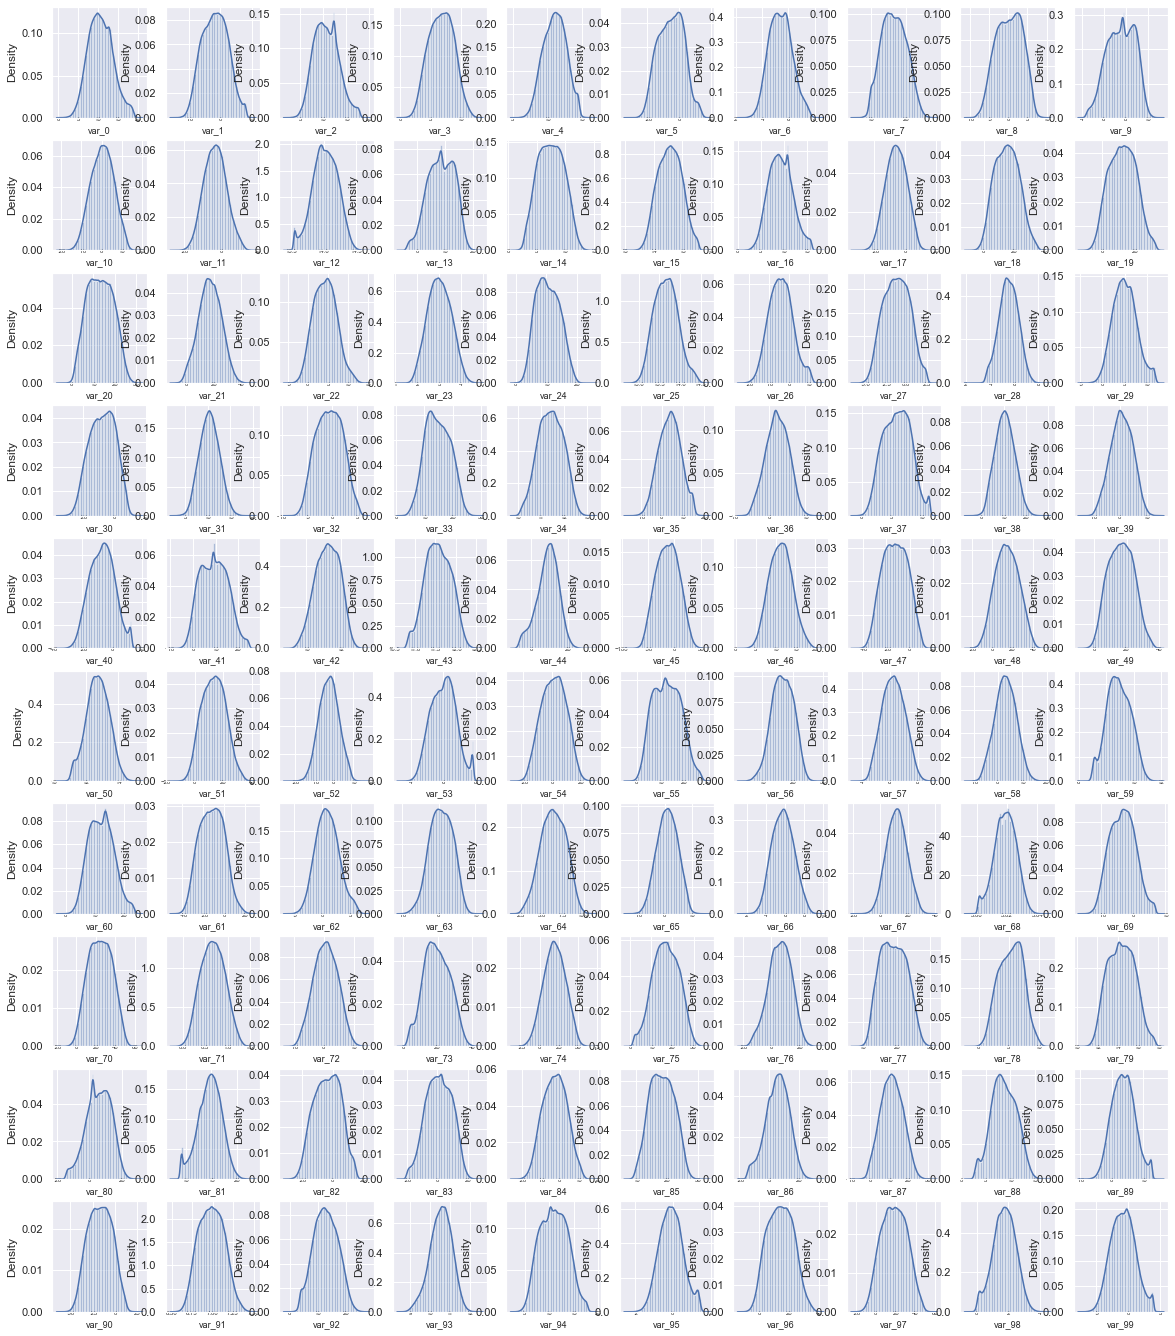

In [19]:
#setting columns and viewing data
columns =train_df.columns.values[2:102] 
plot_distribution(train_df,columns)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

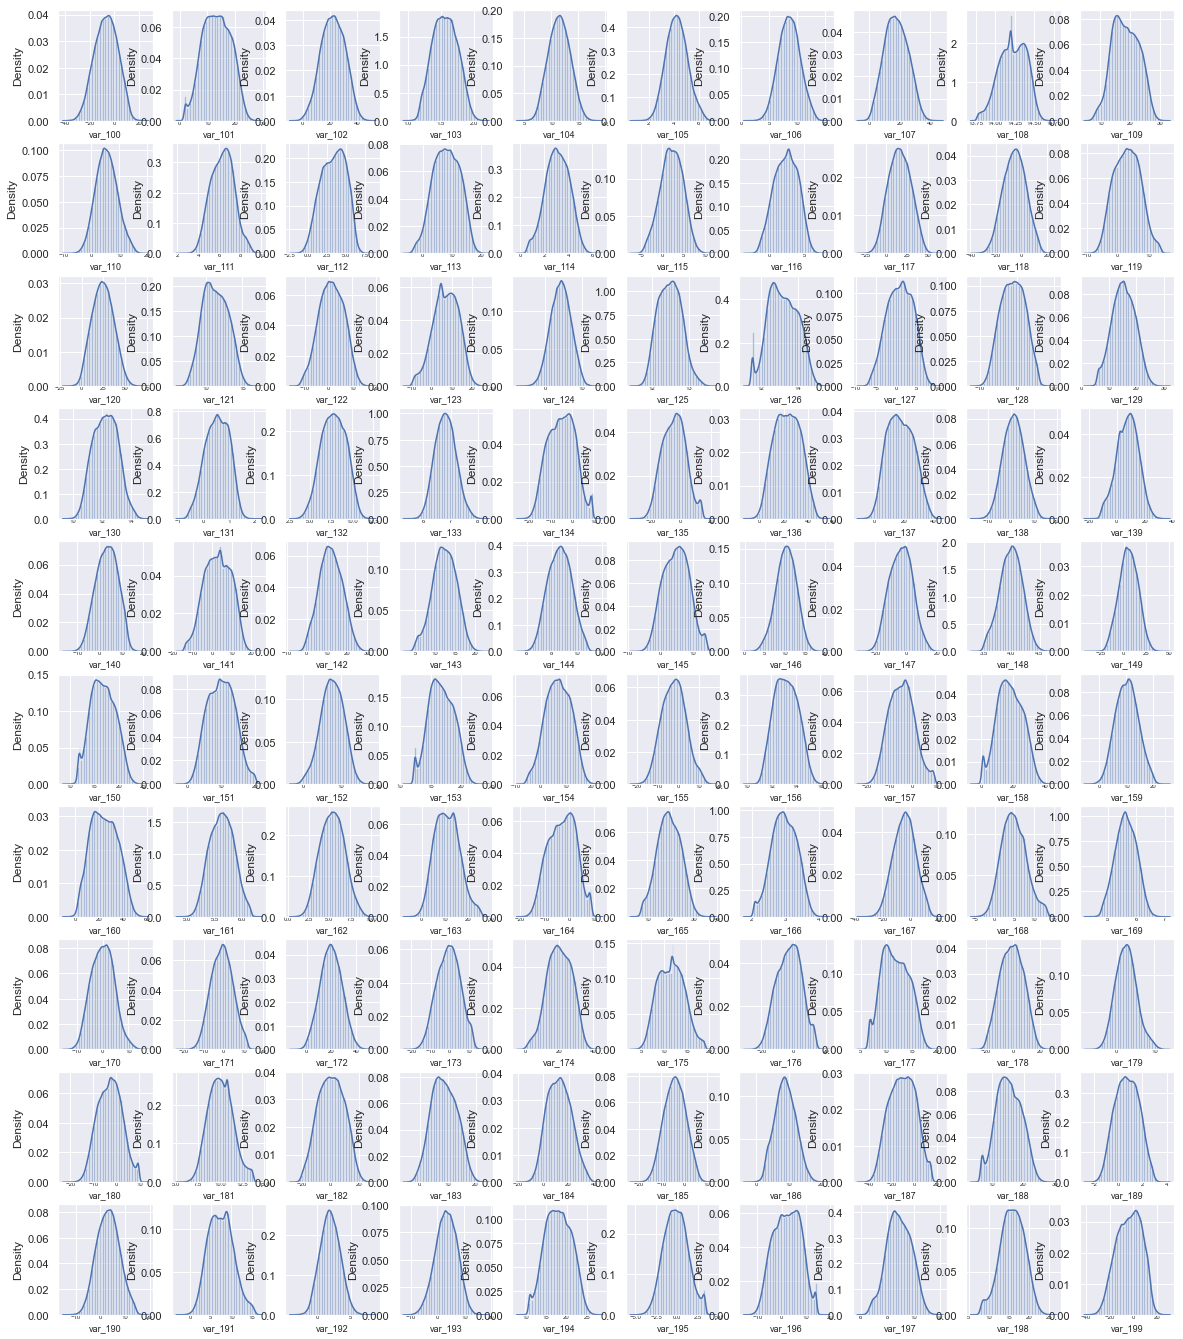

In [20]:
#viewing data for remaining columns
columns=train_df.columns.values[102:]
plot_distribution(train_df,columns)

From the same function we can view the distribution of test set as well. from the above plots we can see that the data is well distributed though there were some exceptions here and there.

## Outlier Analysis

In [21]:
def feature_boxplot(df, columns):
    sns.set(style='whitegrid')
    fig, ax = plt.subplots(10,10,figsize=(18,24))
    plt.title("Outliers")
    i=0
    for col in columns:
        i += 1
        plt.subplot(10,10,i)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize=9)
        plt.tick_params(axis='x', labelsize=7, pad= -7)
    plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

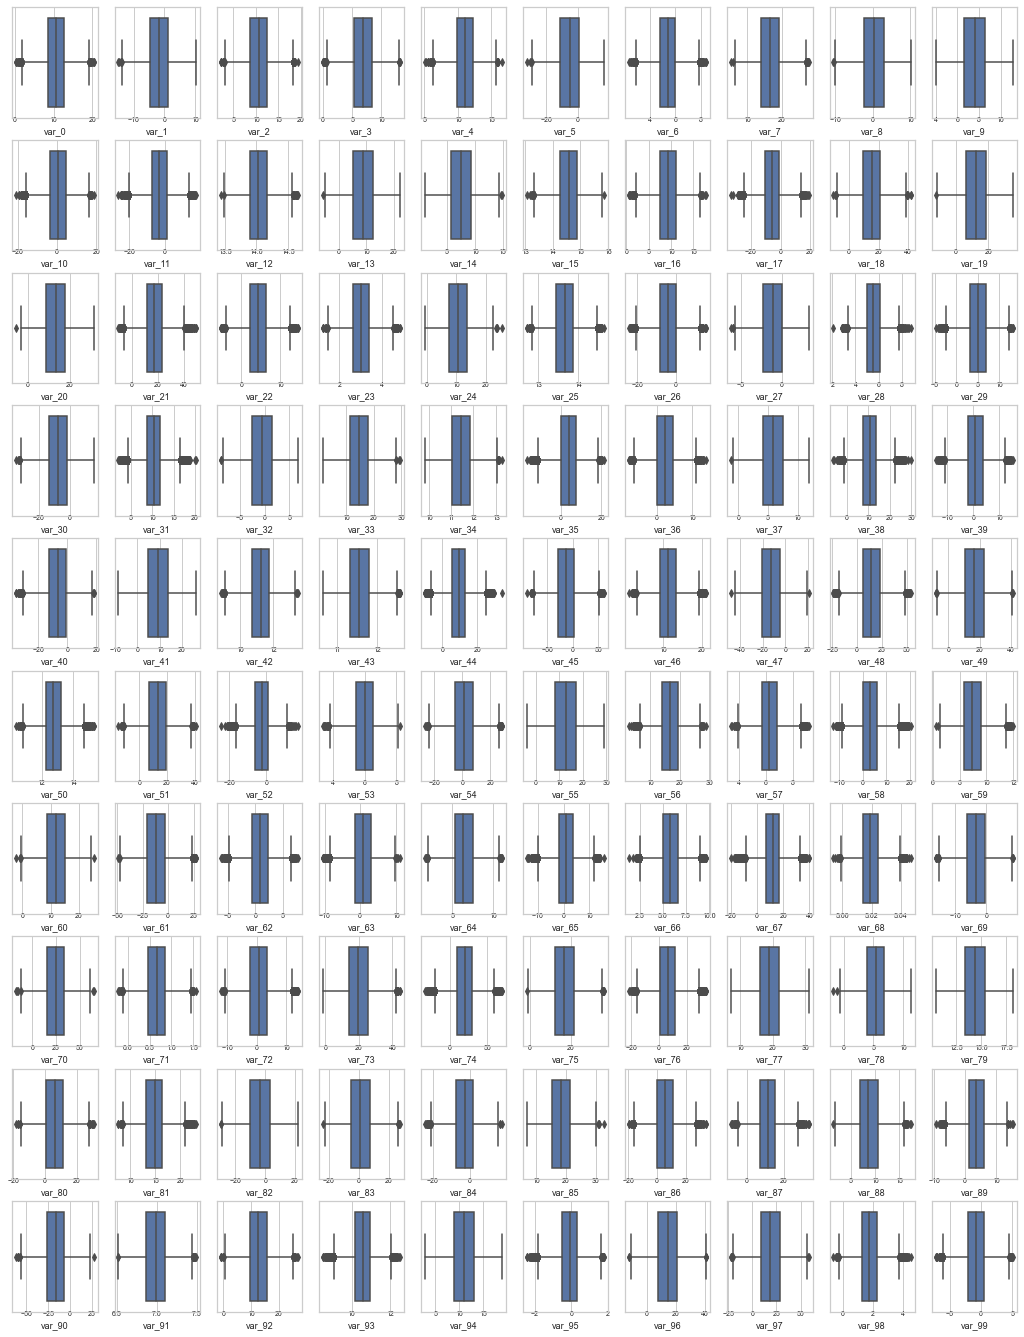

In [22]:
columns=train_df.columns.values[2:102]
feature_boxplot(train_df,columns)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

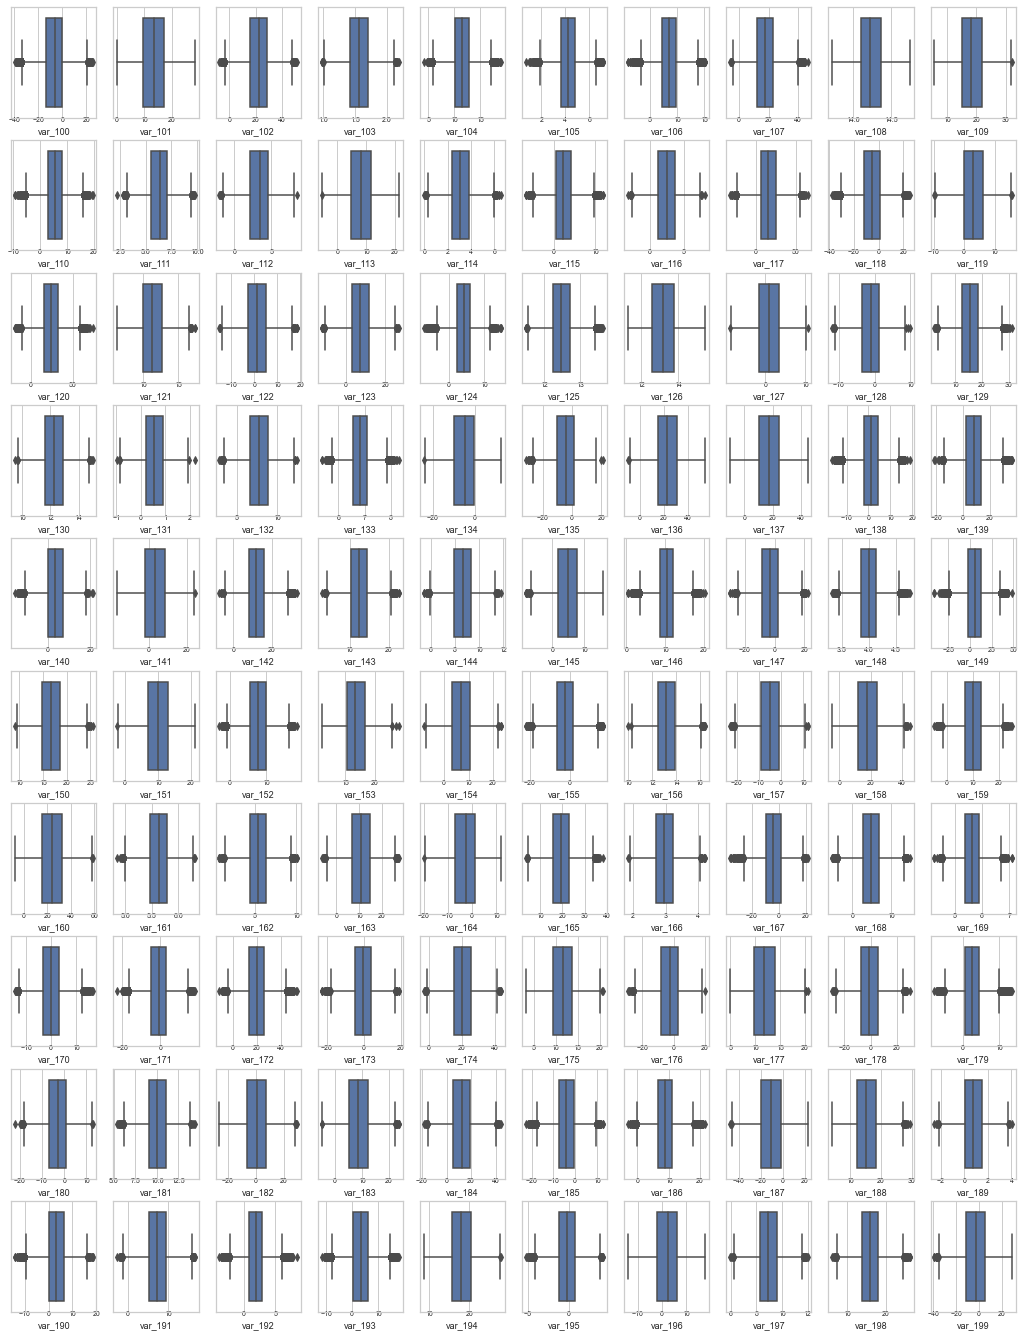

In [23]:
columns=train_df.columns.values[102:]
feature_boxplot(train_df,columns)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

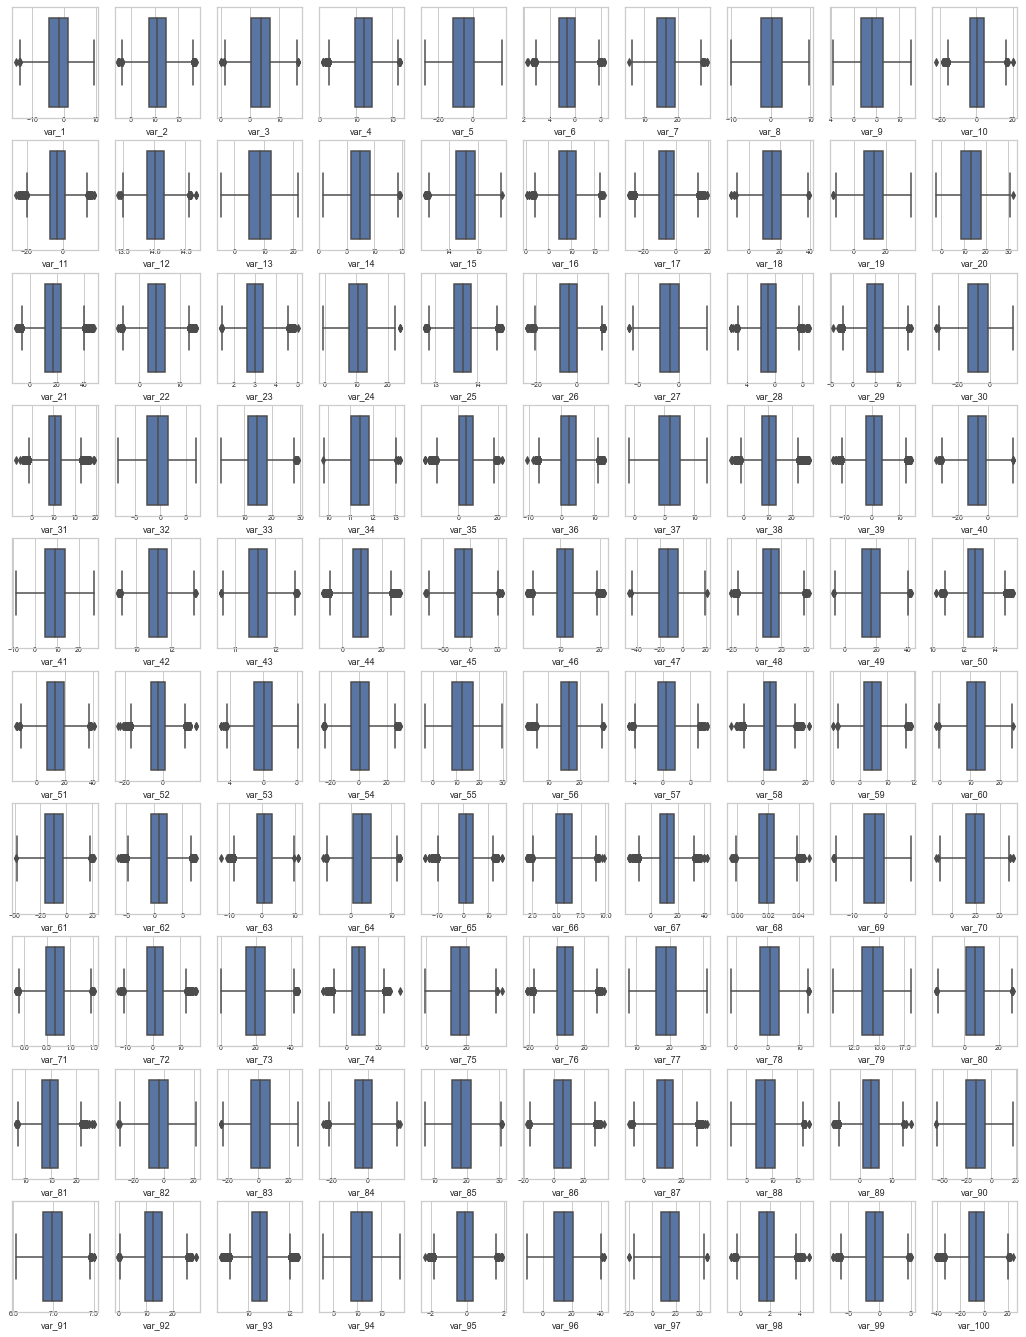

In [24]:
#checking for outliers in test data set
columns = test_df.columns.values[2:102]
feature_boxplot(test_df,columns)

We the box plots we can see that almost all the variables have outliers so we have to get rid of them.

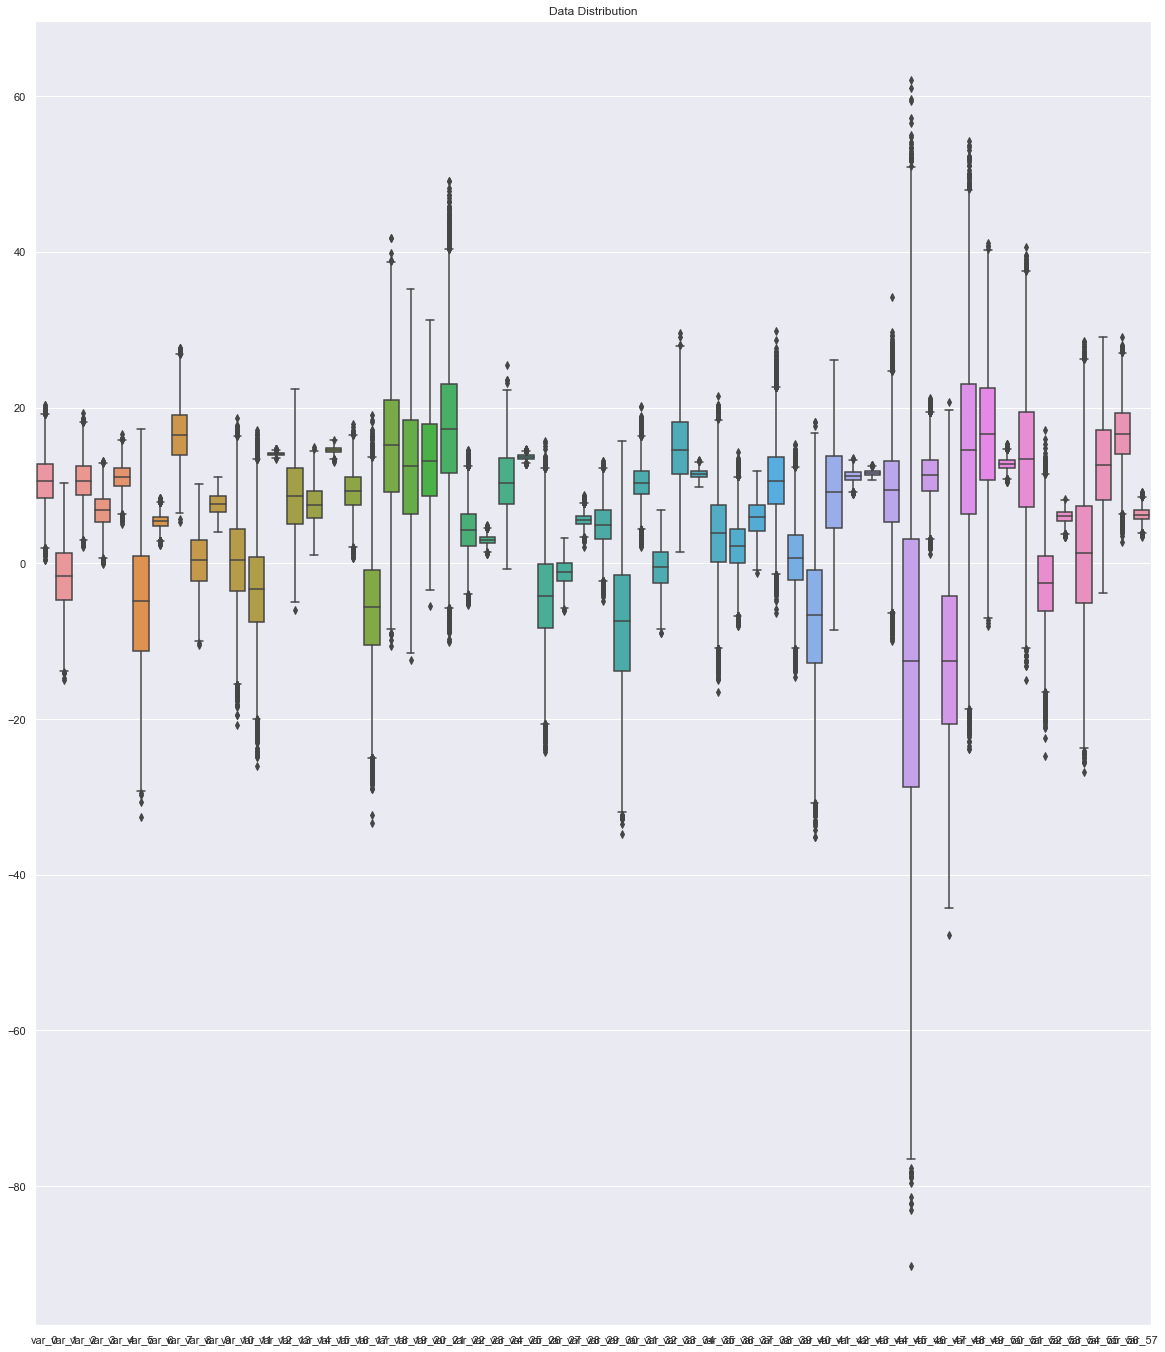

In [4]:
#Finding the outliers in the data
cols=train_df.columns.values[2:60]
fig, ax = plt.subplots(figsize=(20,24))

sns.boxplot(data=train_df[cols],ax=ax)
plt.title("Data Distribution")
plt.savefig('all.png')
plt.show()

In [79]:
#creating columns list
cnames = train_df.drop(['target','ID_code'],axis=1).columns
cnames

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=200)

In [4]:
#copying df
df_train =train_df.copy()
df_test = test_df.copy()

In [28]:
#checking the number of observations dropped
print("Total number of observations dropped in test set:",df_test.shape[0]-test_df.shape[0])
test_df.shape

Total number of observations dropped in test set: 0


(200000, 201)

## Feature Selection

Now lets check the correlation between the features in train set

<AxesSubplot:>

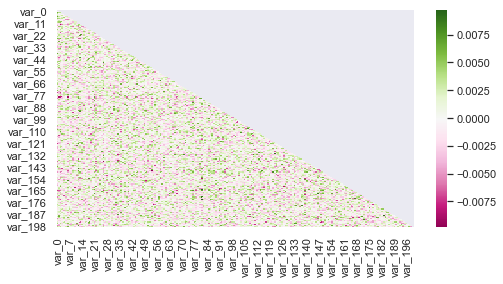

In [10]:
numerical_features = train_df.columns[2:]
sns.set(rc={'figure.figsize':(8,4)})

# Compute the correlation matrix
correlation = train_df[numerical_features].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation, mask=mask,cmap='PiYG')

From the color of the graph we can see that there isn't much correlation between the variables. So, we have to keep all the 200 columns. 

In [30]:
## DIMENSIONALITY REDUCTION

#The standard PCA always finds linear principal components to represent the data in lower dimension. Sometime, we need non-linear principal components.If we apply standard PCA for the below data, it will fail to find good representative direction. Kernel PCA (KPCA) rectifies this limitation.

#Kernel PCA just performs PCA in a new space.
#It uses Kernel trick to find principal components in different space (Possibly High Dimensional Space).
#PCA finds new directions based on covariance matrix of original variables. It can extract maximum P (number of features) eigen values. KPCA finds new directions based on kernel matrix. It can extract n (number of observations) eigenvalues.
#PCA allow us to reconstruct pre-image using few eigenvectors from total P eigenvectors. It may not be possible in KPCA.
#The computational complexity for KPCA to extract principal components take more time compared to Standard PCA.

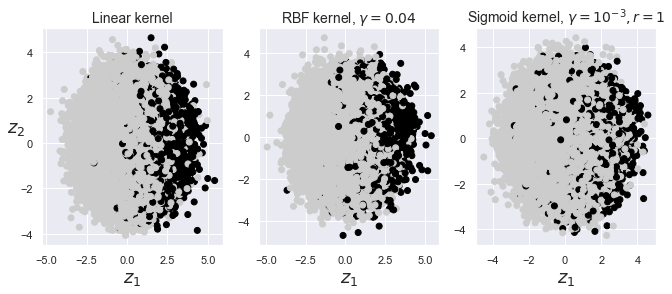

In [8]:
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_df[numerical_features])         

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)


plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), 
                            (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
       
    PCA_train_x = PCA(2).fit_transform(train_scaled)
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1], c=train_df.target, cmap="nipy_spectral_r")
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

In [32]:
#it could be considered that both the positive and negative points are overlapping and can not be seperable.

In [33]:
#copying data
data_Train =train_df.copy()
data_Test  =test_df.copy()

## Feature Scaling

While observing the distributions there were slight variations here and there and even in description of the dataset standard deviation of the variables is high.
So, before going for modelling lets normalize the data.

In [80]:
from numpy import mean
from numpy import std
#Normalization of train set   
for i in cnames:
    train_df[i]=(train_df[i]-mean(train_df[i]))/(std(train_df[i]))

In [81]:
train_df.head()

ID_code  target     var_0     var_1     var_2     var_3     var_4  \
0  train_0       0 -0.577102 -1.273737  0.451707 -0.833709  0.235571   
1  train_1       0  0.269959 -0.622138  1.190360 -0.688846  0.790975   
2  train_2       0 -0.681113 -0.276066  0.516988  0.536516 -0.305477   
3  train_3       0  0.125158 -0.129426 -0.667575  0.195355  0.927992   
4  train_4       0 -0.277303  0.035610  0.817683 -0.077829  0.738607   

      var_5     var_6     var_7  ...   var_190   var_191   var_192   var_193  \
0 -0.536430 -0.334926  0.608751  ...  0.263374 -1.149158  0.817469 -0.411013   
1  1.539900  0.244461 -0.003525  ...  0.966611  0.093605  0.443623  1.908764   
2 -0.511033  1.769839 -0.564749  ... -0.072093  0.777997 -0.174131 -0.412316   
3  0.410672  0.500633 -0.474201  ...  0.270216 -0.891456 -0.818468 -0.478548   
4  0.955574  0.613372  0.791544  ... -1.036191  0.688988 -1.405987  1.468536   

    var_194   var_195   var_196   var_197   var_198   var_199  
0  0.168705 -1.578117  1.022131 -0.373968 -1.026398  0.214135  
1 -0.817594  1.522342  1.067654 -0.129400  0.825417  0.505685  
2  1.151591  2.297370 -1.617906 -0.695141 -0.381449  0.356681  
3  1.607869 -0.789517 -0.959020  1.501744  0.697118 -0.543502  
4 -1.501101 -0.958473  0.297627  0.645537  0.706318 -0.525375  

[5 rows x 202 columns]

In [7]:
#Normalization of test set
for i in cnames:
    test_df[i]=(test_df[i]-mean(test_df[i]))/(std(test_df[i]))

In [8]:
test_df.head()

ID_code     var_0     var_1     var_2     var_3     var_4     var_5  \
0  test_0  0.133982  2.327446  0.852790  1.286580  0.220422  0.339302   
1  test_1 -0.700870  0.712423  0.226756 -0.780630 -1.162422  0.132014   
2  test_2 -1.704490 -2.161579 -0.215177  0.126508 -0.503324  1.887818   
3  test_3 -0.698565  0.074754  0.499091 -0.103918 -1.379935  1.045199   
4  test_4  0.344802  0.369148  1.299241  0.468835 -1.220512 -0.449119   

      var_6     var_7     var_8  ...   var_190   var_191   var_192   var_193  \
0  0.502075  0.507628  0.556964  ... -1.174489  1.451559 -2.267588 -0.218044   
1  0.699025  0.613951 -1.407056  ...  1.631809  0.455057 -0.665993  1.703425   
2 -0.601566  1.087629  0.373846  ... -0.865298  1.168601  0.036728 -0.285819   
3 -0.549870  1.178826  0.929500  ...  1.401915  0.534953 -0.181048  0.064893   
4  1.670363 -1.730001  0.813551  ...  0.227660  0.566588 -0.434095  0.013961   

    var_194   var_195   var_196   var_197   var_198   var_199  
0 -1.364614  1.818985  0.380899  1.962828 -0.131945 -0.526357  
1 -0.770691  0.427340 -0.693329  1.041340  1.083560 -1.705010  
2 -1.597018  1.582008 -1.725840 -2.009582  1.338254 -1.916905  
3 -0.894583  2.307698  0.305857  0.344306 -0.948042 -0.092749  
4  0.495832 -0.106558 -1.368278 -1.763736 -0.645853 -0.571065  

[5 rows x 201 columns]

In [82]:
#copying the normalised data
train_N= train_df.copy()
test_N  = test_df.copy()

In [83]:
#dropping ID_code variable from both train and test sets
train_df2=train_df.drop(columns='ID_code',axis=1)
test_df2 =test_df.drop(columns='ID_code',axis=1)

## Resampling

In [84]:
#Separating the dependent and independent variables
y =train_df['target']
X =train_df.drop(['target'],axis=1)

In [85]:
count_class_0, count_class_1 = y.value_counts()
count_class_0, count_class_1

(179902, 20098)

In [86]:
df_class_0 = train_df[train_df['target'] == 0]
df_class_1 = train_df[train_df['target'] == 1]

In [87]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

Random under-sampling:
1    20098
0    20098
Name: target, dtype: int64


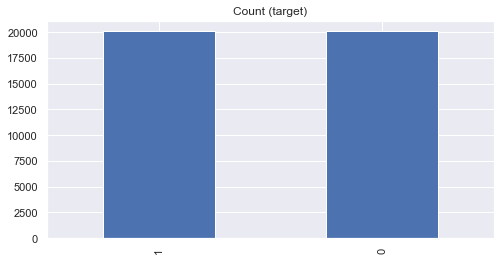

In [88]:
print('Random under-sampling:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

In [89]:
df_test_under.head()

ID_code  target     var_0     var_1     var_2     var_3  \
39614    train_39614       0 -0.017768 -0.327523  1.497227  0.662439   
74828    train_74828       0 -1.099265  0.190424  1.704884 -1.558708   
22994    train_22994       0  1.042645 -0.674779 -0.600060  0.121161   
35832    train_35832       0  1.764806  0.870788 -0.541065  0.894268   
179880  train_179880       0  0.381108  1.065305  0.596772  1.086505   

           var_4     var_5     var_6     var_7  ...   var_190   var_191  \
39614  -0.876775  0.238352 -1.089941  0.430697  ... -1.444708 -0.280858   
74828   0.472211 -0.967232 -2.280795 -0.653366  ...  0.492633 -0.419417   
22994   0.965081  0.679480  1.992316  1.378747  ... -0.842109  0.265703   
35832   0.653587 -0.688009  0.391818 -0.424231  ... -0.423021 -1.493422   
179880 -0.709384 -0.763245 -1.210411 -1.175269  ...  1.034639  0.090330   

         var_192   var_193   var_194   var_195   var_196   var_197   var_198  \
39614  -0.090190  1.540129 -0.183846  0.969861 -1.213092  0.444805  1.505039   
74828  -1.049999 -1.150188 -1.312945 -0.373600 -2.148730  0.487447  0.382930   
22994   1.224660 -1.480923  0.673848 -0.121950 -0.679720  0.112673  0.532452   
35832  -0.791141 -1.096531  0.022460  0.841272  1.988423 -0.843900  0.068909   
179880  0.615361 -0.186841 -0.908690  1.098729  0.543834  1.151059  1.589531   

         var_199  
39614   0.650780  
74828  -1.732533  
22994   1.253291  
35832   0.734091  
179880 -1.025338  

[5 rows x 202 columns]

In [90]:
y =df_test_under['target']
X =df_test_under.drop(['target','ID_code'],axis=1)
X.head()

var_0     var_1     var_2     var_3     var_4     var_5     var_6  \
39614  -0.017768 -0.327523  1.497227  0.662439 -0.876775  0.238352 -1.089941   
74828  -1.099265  0.190424  1.704884 -1.558708  0.472211 -0.967232 -2.280795   
22994   1.042645 -0.674779 -0.600060  0.121161  0.965081  0.679480  1.992316   
35832   1.764806  0.870788 -0.541065  0.894268  0.653587 -0.688009  0.391818   
179880  0.381108  1.065305  0.596772  1.086505 -0.709384 -0.763245 -1.210411   

           var_7     var_8     var_9  ...   var_190   var_191   var_192  \
39614   0.430697  1.385526 -0.008693  ... -1.444708 -0.280858 -0.090190   
74828  -0.653366 -0.093368  0.940082  ...  0.492633 -0.419417 -1.049999   
22994   1.378747  0.997303  0.961052  ... -0.842109  0.265703  1.224660   
35832  -0.424231 -1.174258  1.160394  ... -0.423021 -1.493422 -0.791141   
179880 -1.175269  0.886190  0.912553  ...  1.034639  0.090330  0.615361   

         var_193   var_194   var_195   var_196   var_197   var_198   var_199  
39614   1.540129 -0.183846  0.969861 -1.213092  0.444805  1.505039  0.650780  
74828  -1.150188 -1.312945 -0.373600 -2.148730  0.487447  0.382930 -1.732533  
22994  -1.480923  0.673848 -0.121950 -0.679720  0.112673  0.532452  1.253291  
35832  -1.096531  0.022460  0.841272  1.988423 -0.843900  0.068909  0.734091  
179880 -0.186841 -0.908690  1.098729  0.543834  1.151059  1.589531 -1.025338  

[5 rows x 200 columns]

In [91]:
X.shape,y.shape

((40196, 200), (40196,))

In [92]:
test_df2=test_df.copy()
test_df2.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.2675  2.1337  ...  -2.1556  11.8495  -1.4300   2.4508  13.7112   2.4669   
1  18.6316 -4.4131  ...  10.6165   8.8349   0.9403  10.1282  15.5765   0.4773   
2  20.2537  1.5233  ...  -0.7484  10.9935   1.9803   2.1800  12.9813   2.1281   
3  20.5660  3.3755  ...   9.5702   9.0766   1.6580   3.5813  15.1874   3.1656   
4  10.6048  2.9890  ...   4.2259   9.1723   1.2835   3.3778  19.5542  -0.2860   

   var_196  var_197  var_198  var_199  
0   4.3654  10.7200  15.4722  -8.7197  
1  -1.4852   9.8714  19.1293 -20.9760  
2  -7.1086   7.0618  19.8956 -23.1794  
3   3.9567   9.2295  13.0168  -4.2108  
4  -5.1612   7.2882  13.9260  -9.1846  

[5 rows x 201 columns]

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Create the pipeline with StandardScaler and RandomForestClassifier
pipe_rf = Pipeline([('StandardScaler', StandardScaler()),
                    ('RandomForestClassifier', RandomForestClassifier(class_weight=None, criterion='gini', max_features='auto',
                            min_samples_leaf=2,
                            min_samples_split=30,
                            min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_jobs=-1, random_state=0,
                            verbose=1, warm_start=False))])

pipe_rf.fit(X, y)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   44.4s finished


Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('RandomForestClassifier',
                 RandomForestClassifier(min_samples_leaf=2,
                                        min_samples_split=30, n_jobs=-1,
                                        random_state=0, verbose=1))])

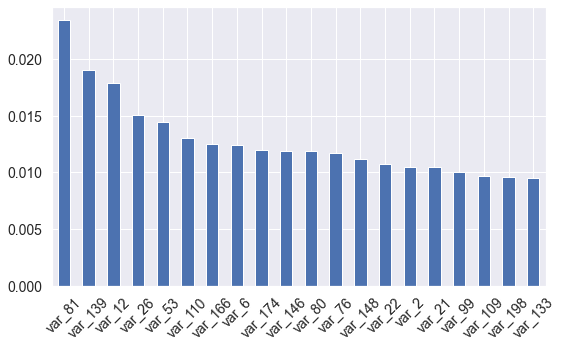

In [21]:
import matplotlib.pyplot as plt

feature_value_names = train_df.columns[2:]
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(pipe_rf.named_steps['RandomForestClassifier'].feature_importances_, feature_value_names)

# Sort the array in descending order of the importances
f_importances = f_importances.sort_values(ascending=False)

# Draw the bar Plot from f_importances 
f_importances[:20].plot(x='Features', y='Importance', kind='bar', figsize=(8,5), rot=45, fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
#dividing data_set into train & test
from sklearn.model_selection import train_test_split
X_trainB, X_testB, Y_trainB, Y_testB= train_test_split(X, y, test_size=0.2, random_state=82)

In [23]:
print(X_trainB.shape, X_testB.shape, Y_trainB.shape, Y_testB.shape)

(32156, 200) (8040, 200) (32156,) (8040,)


In [24]:
X_res, Y_res = X_trainB.copy(),Y_trainB.copy()

In [25]:
X_res.shape,Y_res.shape

((32156, 200), (32156,))

In [26]:
YES = Y_res==1

NO  = Y_res==0

In [27]:
yes=len(YES)
no=len(NO)

Now we can see that we have a balanced data set after performing over sampling on target column.

# <a>Modelling</a>

In [16]:
#importing packages 
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier


from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import plot_confusion_matrix

In [4]:
# group of list to build Datframe of results
accuracy=[]
Precision=[]
Recall_score=[]
Specificity_list=[]
True_pve=[]
True_nve=[]
False_nve=[]
False_pve=[]
F1_Score=[]
F2_Score=[]
AUC=[]
k_list=[]
models_name=['ExtraTreesClassifier','LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','GaussianNB','BaggingClassifier','AdaBoostClassifier'
            ,'RandomForestClassifier','QuadraticDiscriminantAnalysis','VotingClassifier(DTC)','SVC(sigmoid)','SVC(linear)','SVC(rbf)']

In [17]:
models = list()
models.append(ExtraTreesClassifier())
models.append(LogisticRegression())
models.append(KNeighborsClassifier())
models.append(DecisionTreeClassifier())
models.append(GaussianNB())
models.append(BaggingClassifier())
models.append(AdaBoostClassifier())
models.append(RandomForestClassifier())
models.append(QuadraticDiscriminantAnalysis())
estimator = [] 
estimator.append(('DTC', DecisionTreeClassifier())) 
  
models.append(VotingClassifier(estimator,voting='soft'))

models.append(SVC(C=1.0,kernel='sigmoid',degree=2, gamma=4,probability=True))
models.append(SVC(probability=True,kernel='linear'))
models.append(SVC(C=1.0,kernel='rbf',degree=1, gamma=0.7,probability=True))

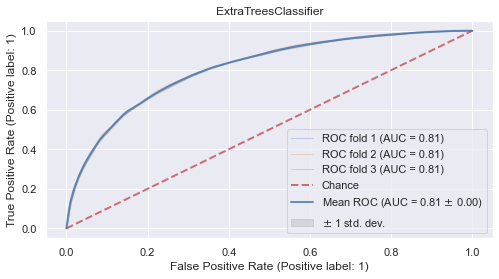

Recall score: 77.6619307149153 %
Specificity: 68.74843999748622 %
False +ve: 31.25156000251378 %
False -ve: 77.6619307149153 %
accuracy_score 0.7318854836247416


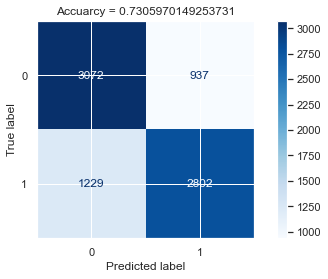

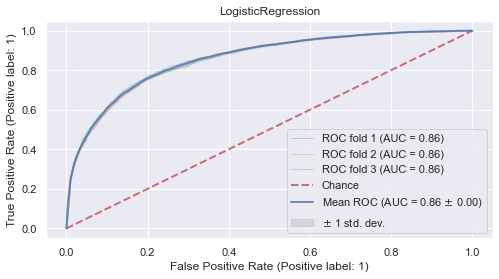

Recall score: 78.22007221657049 %
Specificity: 77.49975320050594 %
False +ve: 22.500246799494075 %
False -ve: 78.22007221657049 %
accuracy_score 0.7785319405409071


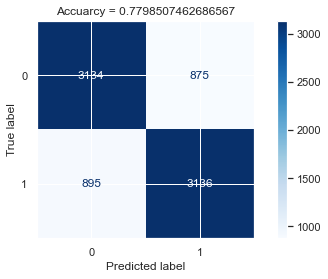

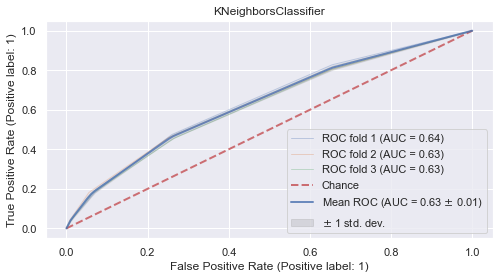

Recall score: 93.70917895344861 %
Specificity: 17.96571207961575 %
False +ve: 82.03428792038426 %
False -ve: 93.70917895344861 %
accuracy_score 0.5575308227947496


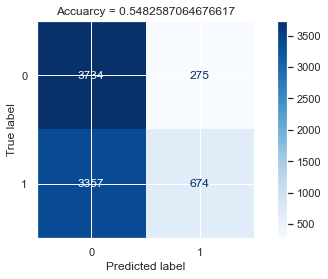

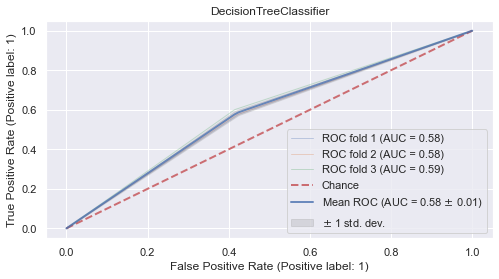

Recall score: 57.99981444618853 %
Specificity: 58.42181170832577 %
False +ve: 41.57818829167423 %
False -ve: 57.99981444618853 %
accuracy_score 0.5820983762960968


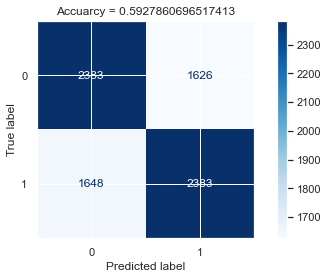

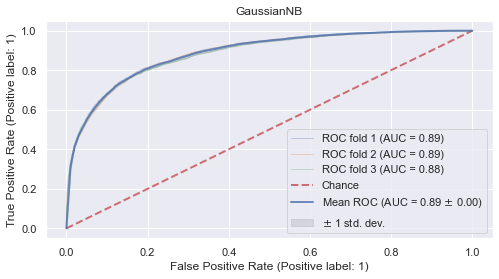

Recall score: 81.15716903078756 %
Specificity: 79.73175511460772 %
False +ve: 20.268244885392278 %
False -ve: 81.15716903078756 %
accuracy_score 0.8043949301205577


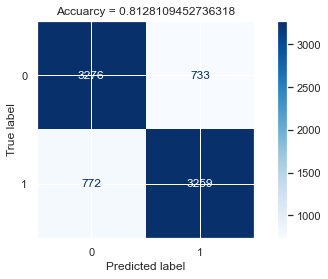

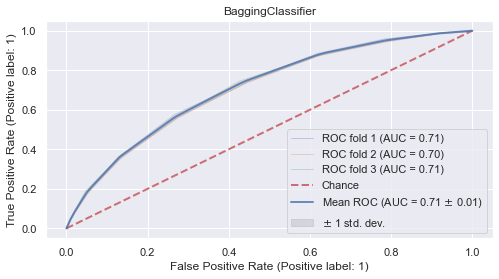

Recall score: 73.10173861442013 %
Specificity: 56.52066992433482 %
False +ve: 43.47933007566517 %
False -ve: 73.10173861442013 %
accuracy_score 0.6479212825753572


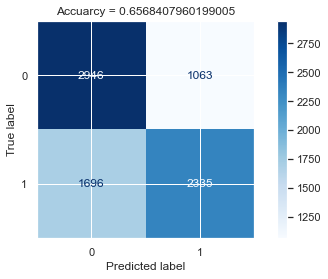

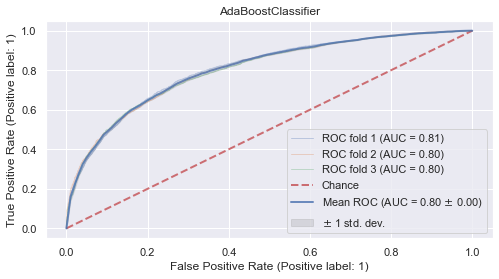

Recall score: 74.82929128845232 %
Specificity: 70.76210572192453 %
False +ve: 29.237894278075476 %
False -ve: 74.82929128845232 %
accuracy_score 0.7278945115943117


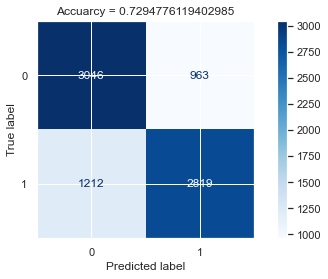

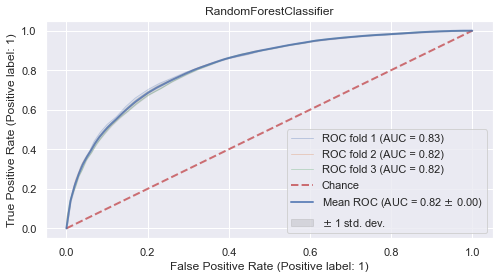

Recall score: 73.94868009410901 %
Specificity: 75.10781306756179 %
False +ve: 24.892186932438204 %
False -ve: 73.94868009410901 %
accuracy_score 0.7452573794583811


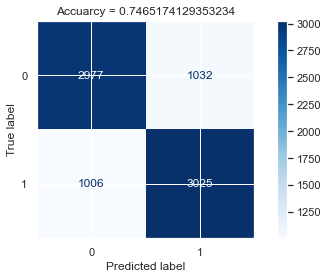

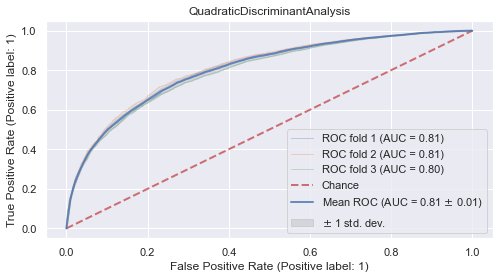

Recall score: 72.25961716745691 %
Specificity: 74.02700846369534 %
False +ve: 25.97299153630465 %
False -ve: 72.25961716745691 %
accuracy_score 0.7314190657142938


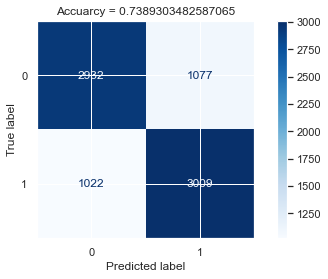

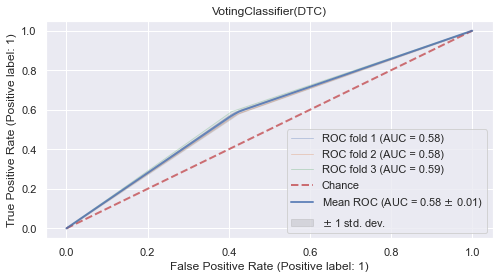

Recall score: 58.14538695398348 %
Specificity: 58.683163733169216 %
False +ve: 41.316836266830784 %
False -ve: 58.14538695398348 %
accuracy_score 0.5841195044577042


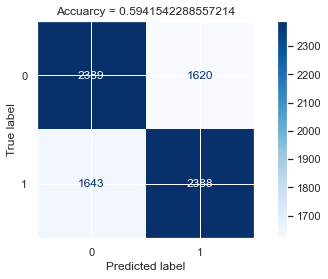

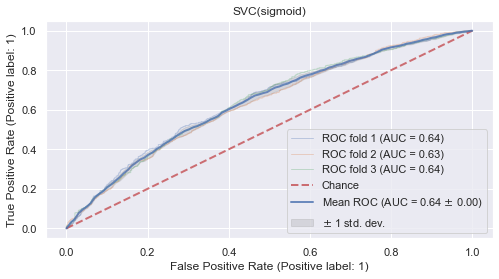

Recall score: 60.58601727803667 %
Specificity: 59.7276859223347 %
False +ve: 40.2723140776653 %
False -ve: 60.58601727803667 %
accuracy_score 0.6015754560530681


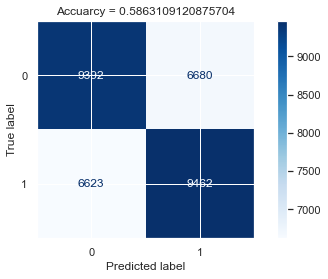

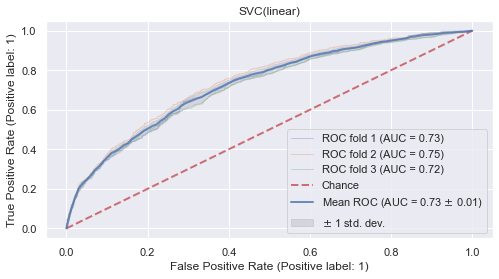

Recall score: 67.49005852529798 %
Specificity: 65.7438663249149 %
False +ve: 34.256133675085096 %
False -ve: 67.49005852529798 %
accuracy_score 0.6662520729684909


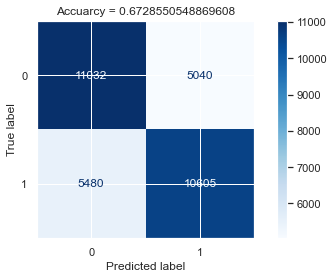

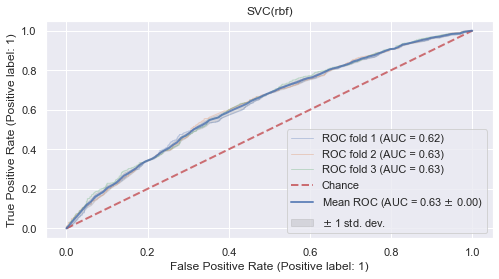

Recall score: 60.62604269224869 %
Specificity: 58.89325353682523 %
False +ve: 41.10674646317477 %
False -ve: 60.62604269224869 %
accuracy_score 0.597636815920398


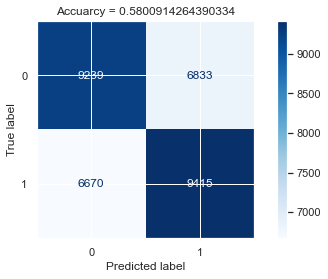

In [32]:
i=0
from sklearn.model_selection import KFold
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
cv=KFold(5)
for model in models:
    temp_accuracy=[]
    temp_Precision=[]
    temp_Recall_score=[]
    temp_Specificity_list=[]
    temp_True_pve=[]
    temp_True_nve=[]
    temp_False_nve=[]
    temp_False_pve=[]
    temp_F1_Score=[]
    temp_F2_Score=[]
    temp_AUC=[]
    list_ns_fpr,list_ns_tpr,list_lr_fpr,list_lr_tpr= [],[],[],[]
    c=0
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    fig, ax = plt.subplots()
    if i==10:
        X=X.loc[:, f_importances[f_importances>0.005].index]
        X=X.loc[:, f_importances[:20].index]
        X_trainB, X_testB, Y_trainB, Y_testB= train_test_split(X, y, test_size=0.8, random_state=82)
        X_res, Y_res = X_trainB.copy(),Y_trainB.copy()
        yes=len(Y_res==1)
        no=len(Y_res==0)
        
        
    for train_index,test_index in cv.split(X_res):
        if c==3:
            break
        X_train,Y_train=X_res.iloc[train_index],Y_res.iloc[train_index]
        X_test,Y_test=X_res.iloc[test_index],Y_res.iloc[test_index]
        selectM=model.fit(X_train,Y_train)
        pred = model.predict(X_test)
        CM =pd.crosstab(Y_test,pred)
        #CM= confusion_matrix(Y_test, model.predict(X_test))
        #let us save TP, TN, FP, FN
        #try:
        TP = CM.iloc[0,0]
        FP = CM.iloc[1,0]
        TN = CM.iloc[1,1]
        FN = CM.iloc[0,1]

        #check recall of the model
        recall = ((TP)/(TP+FN))*100
        specificity = ((TN)/(TN+FP))*100
        false_positive = ((FP)/(FP+TN))*100
        false_neg = ((TP)/(FN+TP))*100
        F2_Measure = (5 * ((TP)/(TP+FP)) * recall) / (4 * ((TP)/(TP+FP)) + recall)

        temp_accuracy.append((TP+TN)/(TP+TN+FP+FN))
        temp_Precision.append((TP)/(TP+FP))
        temp_Recall_score.append(recall)
        temp_Specificity_list.append(specificity)
        temp_False_nve.append(false_neg)
        temp_False_pve.append(false_positive)
        temp_F1_Score.append((2*TP)/(2*TP+FP+FN))
        temp_F2_Score.append(F2_Measure)
        temp_True_pve.append(TP)
        temp_True_nve.append(TN)
        #except:
         #   print('  ')
        # generate a no skill prediction (majority class)
        ns_probs = [0 for _ in range(len(Y_test))]

        # predict probabilities

        lr_probs = model.predict_proba(X_test)
        # keep probabilities for the positive outcome only
        lr_probs = lr_probs[:, 1]

        # calculate scores
        try:
            ns_auc = roc_auc_score(Y_test, ns_probs)
            lr_auc = roc_auc_score(Y_test, lr_probs)
            # calculate roc curves
            ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
            lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
            temp_AUC.append(lr_auc)
            list_ns_fpr.append(ns_fpr)
            list_ns_tpr.append(ns_tpr)
            list_lr_fpr.append(lr_fpr)
            list_lr_tpr.append(lr_tpr)
        except:
            print('')
        c=c+1
        
        viz = plot_roc_curve(model, X_res.iloc[test_index],Y_res.iloc[test_index],
                         name='ROC fold {}'.format(c),
                         alpha=0.3, lw=1, ax=ax)
        interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
            label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
            lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    label=r'$\pm$ 1 std. dev.')

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
           title=models_name[i])
    ax.legend(loc="lower right")
    plt.show()
    p1=((yes/len(X_res))*((mean(temp_True_pve)+mean(temp_False_pve))/len(X_res)))
    p2=((no/len(X_res))*((mean(temp_True_nve)+mean(temp_False_nve))/len(X_res)))
    p=p1+p2
    k=(mean(temp_accuracy)-p)/(1-p)
    print('Recall score: {} %'.format(mean(temp_Recall_score)))
    print('Specificity: {} %'.format(mean(temp_Specificity_list)))
    print('False +ve: {} %'.format(mean(temp_False_pve)))
    print('False -ve: {} %'.format(mean(temp_False_nve)))
    print('accuracy_score',mean(temp_accuracy))
    model_fit=model.fit(X_trainB,Y_trainB)
    plot_confusion_matrix(model_fit, X_testB, Y_testB,cmap=plt.cm.Blues)
    plt.title('Accuarcy = '+str(accuracy_score(Y_testB, model_fit.predict(X_testB))))
                                 #display_labels=Y_trainB,
                                 #cmap=plt.cm.Blues)
                                 #normalize=normalize)
    plt.show()
    
    #pyplot.errorbar(3, means, yerr=[mins, maxs], fmt='o')
    
    accuracy.append(mean(temp_accuracy))
    Precision.append(mean(temp_Precision))
    Recall_score.append(mean(temp_Recall_score))
    Specificity_list.append(mean(temp_Specificity_list))
    False_nve.append(mean(temp_False_nve))
    False_pve.append(mean(temp_False_pve))
    F1_Score.append(mean(temp_F1_Score))
    F2_Score.append(mean(temp_F2_Score))
    AUC.append(mean_auc)
    k_list.append(k)                                                                         
                                                                            
    #print('Precision',mean)
    #print('F1-Score',mean)
    i=i+1


In [33]:
arr=np.array([accuracy,Precision,Recall_score,Specificity_list,False_nve,False_pve,F1_Score,F2_Score,AUC,k_list]).transpose()
df=pd.DataFrame(arr,index=models_name
                ,columns=['accuracy','Precision','Recall_score','Specificity_list','True_pve Rate','False_pve Rate','F1_Score','F2_Score','AUC','Cohen’s Kappa'])
df

accuracy  Precision  Recall_score  \
ExtraTreesClassifier           0.731885   0.712210     77.661931   
LogisticRegression             0.778532   0.775882     78.220072   
KNeighborsClassifier           0.557531   0.532127     93.709179   
DecisionTreeClassifier         0.582098   0.581454     57.999814   
GaussianNB                     0.804395   0.799445     81.157169   
BaggingClassifier              0.647921   0.626023     73.101739   
AdaBoostClassifier             0.727895   0.718146     74.829291   
RandomForestClassifier         0.745257   0.747381     73.948680   
QuadraticDiscriminantAnalysis  0.731419   0.734741     72.259617   
VotingClassifier(DTC)          0.584120   0.583520     58.145387   
SVC(sigmoid)                   0.601575   0.605044     60.586017   
SVC(linear)                    0.666252   0.667101     67.490059   
SVC(rbf)                       0.597637   0.600263     60.626043   

                               Specificity_list  True_pve Rate  \
ExtraTreesClassifier                  68.748440      77.661931   
LogisticRegression                    77.499753      78.220072   
KNeighborsClassifier                  17.965712      93.709179   
DecisionTreeClassifier                58.421812      57.999814   
GaussianNB                            79.731755      81.157169   
BaggingClassifier                     56.520670      73.101739   
AdaBoostClassifier                    70.762106      74.829291   
RandomForestClassifier                75.107813      73.948680   
QuadraticDiscriminantAnalysis         74.027008      72.259617   
VotingClassifier(DTC)                 58.683164      58.145387   
SVC(sigmoid)                          59.727686      60.586017   
SVC(linear)                           65.743866      67.490059   
SVC(rbf)                              58.893254      60.626043   

                               False_pve Rate  F1_Score  F2_Score       AUC  \
ExtraTreesClassifier                31.251560  0.742932  3.434986  0.810441   
LogisticRegression                  22.500247  0.778962  3.731313  0.858014   
KNeighborsClassifier                82.034288  0.678782  2.601537  0.634324   
DecisionTreeClassifier              41.578188  0.580701  2.795165  0.582105   
GaussianNB                          20.268245  0.805436  3.845679  0.886342   
BaggingClassifier                   43.479330  0.674443  3.026434  0.710280   
AdaBoostClassifier                  29.237894  0.732891  3.457969  0.803220   
RandomForestClassifier              24.892187  0.743364  3.591668  0.823531   
QuadraticDiscriminantAnalysis       25.972992  0.728589  3.530104  0.805615   
VotingClassifier(DTC)               41.316836  0.582449  2.804974  0.584135   
SVC(sigmoid)                        40.272314  0.605344  2.908940  0.639511   
SVC(linear)                         34.256134  0.670875  3.208572  0.730696   
SVC(rbf)                            41.106746  0.602998  2.886803  0.628791   

                               Cohen’s Kappa  
ExtraTreesClassifier                0.684658  
LogisticRegression                  0.736711  
KNeighborsClassifier                0.498917  
DecisionTreeClassifier              0.525371  
GaussianNB                          0.766012  
BaggingClassifier                   0.593812  
AdaBoostClassifier                  0.680320  
RandomForestClassifier              0.699550  
QuadraticDiscriminantAnalysis       0.684267  
VotingClassifier(DTC)               0.527452  
SVC(sigmoid)                        0.540522  
SVC(linear)                         0.609229  
SVC(rbf)                            0.536343

In [5]:
#accuracy=[0.731885,0.778532,0.557531,0.582098,0.804395,0.647921,0.727895,0.745257,0.731419,0.584120,0.601575,0.666252,0.597637]

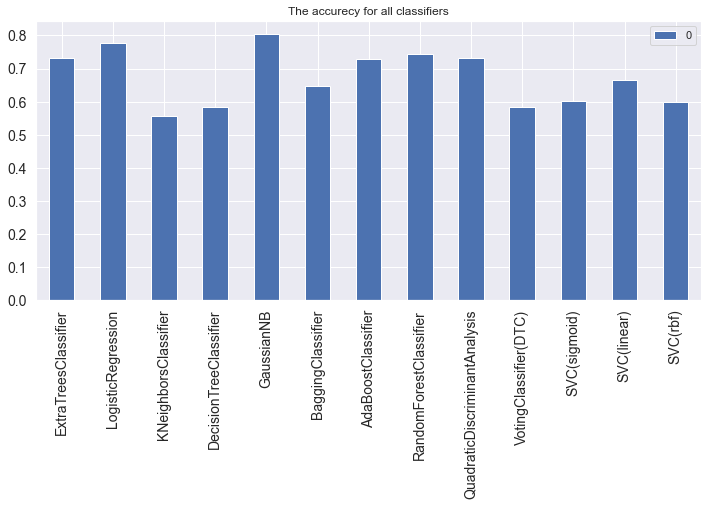

In [32]:
df2=pd.DataFrame(accuracy,index=models_name)
df2.plot(kind='bar', figsize=(10,7), rot=90, fontsize=14)

# Show the plot
plt.tight_layout()
plt.title('The accurecy for all classifiers')
plt.show()

# Predicting on Test data

# Removing the outliers from the training data + Normalization.

In [31]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [32]:
#detecting and deleting outliers from the  train data
for i in cnames:
    q75, q25 =np.percentile(train_df.loc[:,i],[75,25])
    iqr  = q75-q25
    min  = q25 - (iqr*1.5)
    max  = q75 + (iqr*1.5)
    train_df = train_df.drop(train_df[train_df.loc[:,i]<min].index) 
    train_df = train_df.drop(train_df[train_df.loc[:,i]>max].index) 

In [33]:
for i in cnames:
    train_df[i]=(train_df[i]-train_df[i].min())/(train_df[i].max()-train_df[i].min())

In [34]:
for i in cnames:
    test_df[i]=(test_df[i]-test_df[i].min())/(test_df[i].max()-test_df[i].min())

In [35]:
y =train_df['target']
X =train_df.drop(['target','ID_code'],axis=1)

In [36]:
test_df2=test_df.drop(['ID_code'],axis=1)

In [53]:
#Predicting on original data without drop null
Gaussian_model=models[4].fit(X,y)
Predictions =Gaussian_model.predict(test_df2)
test_df['target']=Predictions
newdf=test_df[['ID_code','target']]
newdf.to_csv("GaussianAndNorm.csv",index=False)

# Kaggle submission

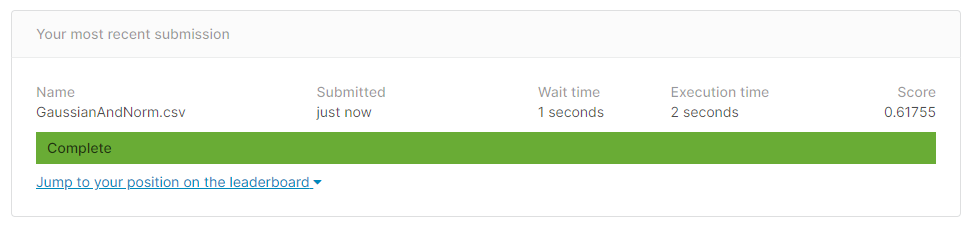

#  Normalization + OverSampling

In [25]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(1)

C:\Users\user\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=1 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [37]:
X_res, Y_res = os.fit_resample(X,y)

In [38]:
X_res.shape,Y_res.shape

((315940, 200), (315940,))

In [39]:
#Predicting on original data without drop null
Gaussian_model=models[4].fit(X_res,Y_res)
Predictions =Gaussian_model.predict(test_df2)
test_df['target']=Predictions
newdf=test_df[['ID_code','target']]
newdf.to_csv("GaussianAndNormAndOverSamb.csv",index=False)

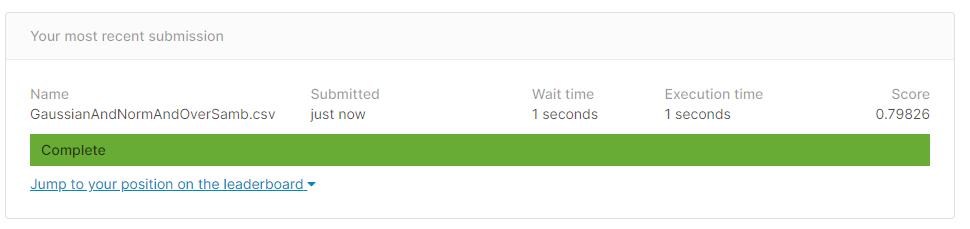

# Standardization+Under sampling

In [93]:
#train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
test_df.shape

(200000, 201)

In [94]:
#Normalization of test set
for i in cnames:
    test_df[i]=(test_df[i]-mean(test_df[i]))/(std(test_df[i]))
test_df2 =test_df.drop(columns='ID_code',axis=1)

In [95]:
y =df_test_under['target']
X =df_test_under.drop(['target','ID_code'],axis=1)
#X.head()

In [96]:
#X_res, Y_res = os.fit_resample(X,y)
X_res, Y_res = X.copy(),y.copy()
X_res.shape,Y_res.shape

((40196, 200), (40196,))

In [97]:
#Predicting on original data without drop null
Gaussian_model=models[4].fit(X_res,Y_res)

In [98]:
Predictions =Gaussian_model.predict(test_df2)

In [99]:
len(test_df),len(test_df2)

(200000, 200000)

In [100]:
test_df['target']=Predictions
newdf=test_df[['ID_code','target']]
newdf.to_csv("Gaussian.csv",index=False)

# Kaggle submission

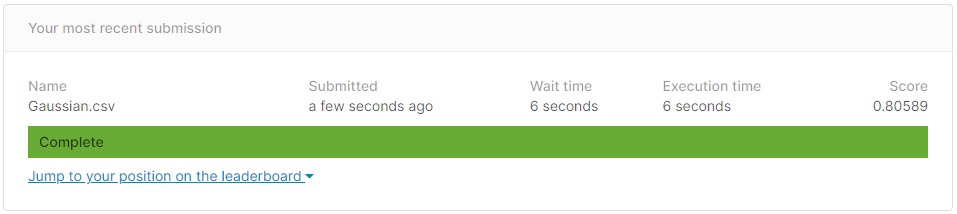

# Ridge Regression

In [65]:
from numpy import arange
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X, y)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
results = search.fit(X, y)

In [66]:
Prediction2 =search.predict(test_df2)

In [67]:
test_df['target']=Predictions
newdf=test_df[['ID_code','target']]
newdf.to_csv("Ridge.csv",index=False)

# Kaggle submission

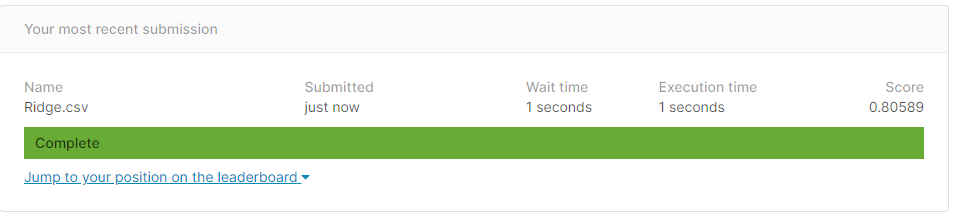

# Build the Light GBM Model

In [3]:
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.335,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.041,
    'learning_rate': 0.0083,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': -1
}

In [35]:
train=X.copy()
target=y.copy()
test=test_df2.copy()
features = list(X.columns)
predictions_List=[]

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold,RepeatedKFold
import lightgbm as lgb
m=0
for j in range(-1,4):
    if m==0:
        test=test_df2.copy()
        test=test[:40196]
        m=1
    else:
        test=test_df2.copy()
        test=test[39216+(40196*j):39216+(40196*(j+1))]

    num_folds = 5
    features = [c for c in train.columns if c not in ['ID_code', 'target']]

    folds = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=2319)
    oof = np.zeros(len(train))
    predictions = np.zeros(len(target))

    print('Light GBM Model')
    for fold_, (trn_idx, val_idx) in enumerate(folds.split(train.values, target.values)):
        print("Fold idx:{}".format(fold_ + 1))
        trn_data = lgb.Dataset(train.iloc[trn_idx][features], label=target.iloc[trn_idx])
        val_data = lgb.Dataset(train.iloc[val_idx][features], label=target.iloc[val_idx])

        clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 4000)
        oof[val_idx] = clf.predict(train.iloc[val_idx][features], num_iteration=clf.best_iteration)
        predictions += clf.predict(test[features], num_iteration=clf.best_iteration) / folds.n_splits

    print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))
    predictions_List.append(predictions)

Light GBM Model
Fold idx:1
Training until validation scores don't improve for 4000 rounds
[5000]	training's auc: 0.94544	valid_1's auc: 0.889964
[10000]	training's auc: 0.972131	valid_1's auc: 0.89445
Early stopping, best iteration is:
[10862]	training's auc: 0.975387	valid_1's auc: 0.894757
Fold idx:2
Training until validation scores don't improve for 4000 rounds
[5000]	training's auc: 0.945235	valid_1's auc: 0.89116
[10000]	training's auc: 0.971766	valid_1's auc: 0.895385
[15000]	training's auc: 0.987096	valid_1's auc: 0.89538
Early stopping, best iteration is:
[13826]	training's auc: 0.984147	valid_1's auc: 0.895562
Fold idx:3
Training until validation scores don't improve for 4000 rounds
[5000]	training's auc: 0.945484	valid_1's auc: 0.892567
[10000]	training's auc: 0.97188	valid_1's auc: 0.896728
Early stopping, best iteration is:
[10069]	training's auc: 0.972154	valid_1's auc: 0.896783
Fold idx:4
Training until validation scores don't improve for 4000 rounds
[5000]	training's auc

In [37]:
ss=[]
ss.extend(predictions_List[0][:39216])
ss.extend(predictions_List[1])
ss.extend(predictions_List[2])
ss.extend(predictions_List[3])
ss.extend(predictions_List[4])

len(ss)

200000

In [38]:
test_df=pd.read_csv('test.csv')

In [39]:
sub = pd.DataFrame({"ID_code": test_df.ID_code.values})
sub["target"] = ss
sub.to_csv('LightGBM.csv', index=False)

# Kaggle submission

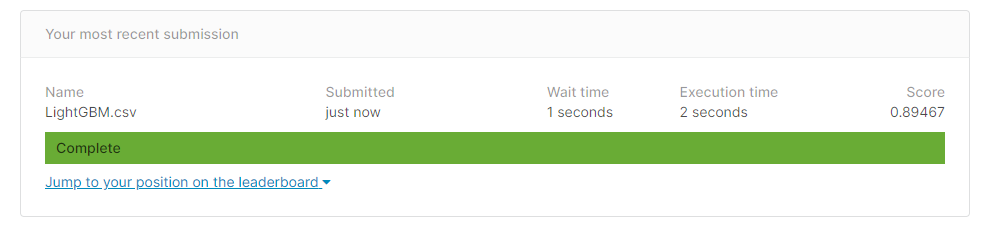